In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

In [ ]:




mainfolder = Path(r"C:\Users\Alex\Downloads\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train")
#mainfolder is train folder
for folder in mainfolder.iterdir():
    if folder.is_dir():
        for file in folder.iterdir():
            if file.is_file() and file.suffix.lower() == '.jpg': #read only jpg files 
                print(f"Datei: {file} Ordner: {folder.name}")  #shows all the files in the folder
                
                

_IncompleteInputError: incomplete input (2140536264.py, line 9)

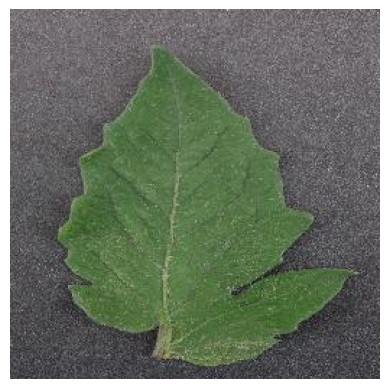

In [3]:



image = cv2.imread(str(r"C:\Users\Alex\Downloads\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Tomato___healthy\c1c04a55-0dd5-48e2-9cc6-76bbcc1899fd___GH_HL Leaf 340.1.JPG"))



# OpenCV liest Bilder im BGR-Format, daher konvertieren wir es in RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show the image using matplotlib
plt.imshow(image)
plt.axis('off')  # no axes for a cleaner look
plt.show()

In [4]:
dim = image.shape
print("Imagedimension:", dim[0], "x", dim[1], "x", dim[2],"Pixel")

Imagedimension: 256 x 256 x 3 Pixel


In [5]:
X= image.reshape(image.shape[1]*image.shape[0], image.shape[2])
print("X shape:", X.shape)
def get_clusters_centroids(X, quantile, n_samples):
    bandwidth = estimate_bandwidth(X, quantile = quantile, n_samples = n_samples)
    cluster = MeanShift(bandwidth = bandwidth)
    cluster.fit(X)
    return cluster.labels_ , cluster.cluster_centers_

X shape: (65536, 3)


In [6]:
labels, centroids = get_clusters_centroids(X, 0.09 , 5)

X_recovered = np.zeros(X.shape)
for i in range(0, len(X)) :
    X_recovered[i] = centroids[labels[i]]

InvalidParameterError: The 'bandwidth' parameter of MeanShift must be a float in the range (0.0, inf) or None. Got np.float64(0.0) instead.

In [ ]:
X_recovered= X_recovered.reshape(image.shape[0], image.shape[1], image.shape[2])

plt.figure()
plt.subplot(121)
plt.imshow(image)
plt.title("original picture")
plt.subplot(122)
plt.imshow(X_recovered)
plt.title("reconstruced picture")
plt.show()